<h1> Financial Econometrics II – Master 203 - Projects - Trend Following Strategy <h1>

<h2> Data Preparation and Preliminary Analysis <h2>

**Import libraries and data**

In [58]:
import Kalman_trend as k
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

**Data Loading**

In [59]:
data_SP500=pd.read_excel('GROUP DATASET.xlsx', 'Feuil2',usecols='A:B',index_col=0)
data_SP500= data_SP500.iloc[1:]
data_SP500.head()

,S&P500 net total return index
"Data source: Bloomberg, Orion Financial Partners",
1999-01-04,1668.52
1999-01-05,1691.23
1999-01-06,1728.94
1999-01-07,1725.47
1999-01-08,1732.75


Data Processing for Kalman filter

In [60]:
dates=pd.to_datetime(data_SP500.index)
daily_prices_SP500=np.array(data_SP500) # We transform the pandas dataframe in to an array for Kalman Filter

**Local Linear Trend**

In [62]:
# The Kalman filter needs : Yt, Xt and Ut as entries.
# We know that for each step, as we use the trend following model, we have Xt=(1 0)

c=np.ones((len(daily_prices_SP500),1))
z=np.zeros((len(daily_prices_SP500),1))
xt=np.concatenate((c,z),axis=1)

# We don't have any control variables so that we put u=0
yt = np.log(daily_prices_SP500.astype(float).flatten())
output=k.Kalman(yt,xt,0)

Optimization terminated successfully.
         Current function value: -2.759564
         Iterations: 12
         Function evaluations: 120
         Gradient evaluations: 20


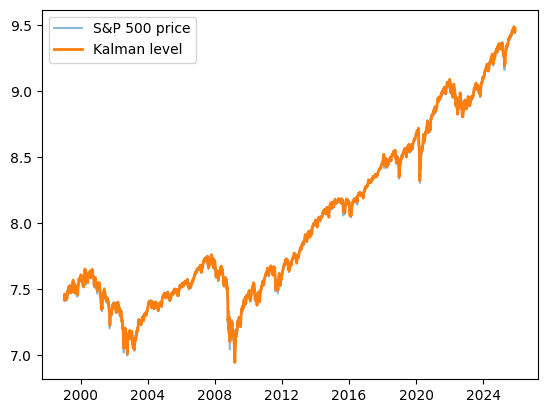

In [63]:
T_t = output[0][:, 0]   # niveau latent
plt.plot(dates,yt, label="S&P 500 price", alpha=0.5)
plt.plot(dates,T_t, label="Kalman level", linewidth=2)
plt.legend()

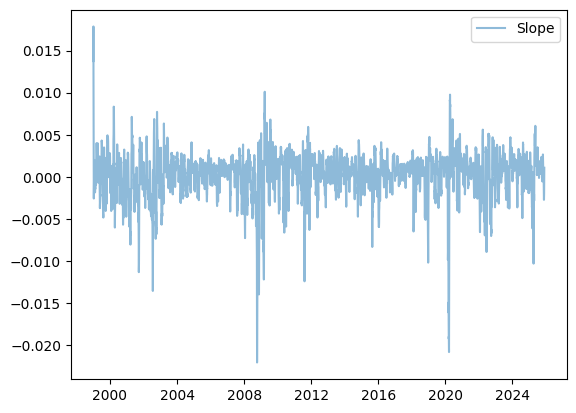

In [68]:
S_t = output[0][:, 1]
# Note: The first value can be an outlier due to the initialization of the filter, so we look only after 1:
# => C'est curieux la première valeur est 0.4 ...
plt.plot(dates[1:],S_t[1:], label="Slope", alpha=0.5)
plt.legend()

<h3> Question 1 <h3>

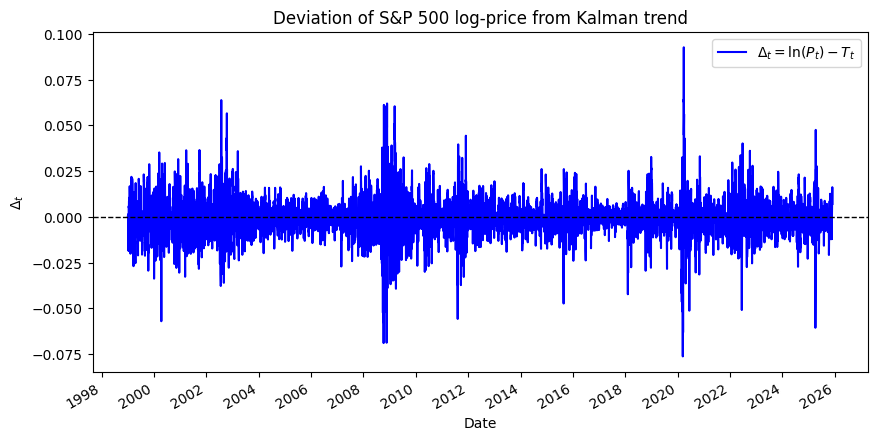

In [65]:
# Δ_t = ln(P_t) - T_t
Delta = yt - T_t

# Tracé
plt.figure(figsize=(10,5))
plt.plot(dates, Delta, label=r'$\Delta_t = \ln(P_t) - T_t$', color='blue')

# ligne zéro pour référence
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# formatage des dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=2))
plt.gcf().autofmt_xdate()

plt.title("Deviation of S&P 500 log-price from Kalman trend")
plt.xlabel("Date")
plt.ylabel(r"$\Delta_t$")
plt.legend()
plt.show()


The variable Δ(t) measures the deviation of the observed log-price from its latent Kalman trend.

- **P_t**: observed market price (e.g., S&P 500).  
- **T_t**: latent level estimated by the Kalman filter, interpreted as the underlying trend or fundamental price.

**Economic interpretation:**
- Δ_t > 0 → market price above its trend → potential overvaluation.  
- Δ_t < 0 → market price below its trend → potential undervaluation.  
- Δ_t ≈ 0 → market price close to its equilibrium level.

This deviation captures short-term mispricing or cyclical fluctuations around the long-term trend.  
It can be used to study mean reversion, market stress episodes, and regime changes in financial markets.
